# Frequency of error logs

Questions being answered in this notebook.
>- [x] Frequency of error logs by *COMPONENT_NAME*
>- [x] Frequency of error logs by *PAGE_ENTITY_TYPE*
>- [x] Frequency of error logs by *PAGE_URL*

In [84]:
import pandas as pd

## Loading error datasets

In [85]:
ltng_error_filtered = pd.read_csv("../../datasets/ltng_error_filtered.csv", low_memory=False)

In [86]:
ltng_error_filtered.head()

,CLIENT_GEO,PAGE_URL,PAGE_CONTEXT,PAGE_ENTITY_TYPE,TIMESTAMP,TIMESTAMP_DERIVED,UI_EVENT_SOURCE,UI_EVENT_TYPE,USER_AGENT,COMPONENT_NAME,REPORT_ID_DERIVED
0,China/Fujian,/lightning/r/LiveChatTranscript/5706P000001RXN...,one:recordHomeFlexipage,LiveChatTranscript,2.022063e+13,2022-06-28T01:14:59.497Z,Error,error,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",NaN,5706P000001RXN6QAO
1,China/Fujian,/lightning/r/LiveChatTranscript/5706P000001RXN...,one:recordHomeFlexipage,LiveChatTranscript,2.022063e+13,2022-06-28T01:14:59.502Z,Error,error,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",NaN,5706P000001RXN6QAO
2,China/Fujian,/lightning/r/LiveChatTranscript/5706P000001RXN...,one:recordHomeFlexipage,LiveChatTranscript,2.022063e+13,2022-06-28T01:14:59.504Z,Error,error,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",NaN,5706P000001RXN6QAO
3,United States/Texas,/lightning/r/LiveChatTranscript/5706P000000wJS...,one:recordHomeFlexipage,LiveChatTranscript,2.022063e+13,2022-06-28T01:15:09.829Z,TypeError,error,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",NaN,5706P000000wJSFQA2
4,United States/Utah,/lightning/r/Report/00O2R000004AmwmUAC/view?qu...,reports:reportBase,Report,2.022063e+13,2022-06-28T01:17:00.510Z,Error,error,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",NaN,00O2R000004AmwmUAC


In [87]:
top_five_problematic_by_errors = pd.read_csv("../../datasets/top_five_problematic_by_errors.csv", low_memory=False)

In [88]:
top_five_problematic_by_errors

,ReportId,ErrorCount
0,00O0b000004AmRrEAK,162
1,00O0b000004keC5EAI,25
2,00O0b000006iNwdEAE,18
3,00O2R000004AmwmUAC,9
4,00O0b000004AmRjEAK,6


In [89]:
above_median_problematic_by_errors = pd.read_csv("../../datasets/above_median_problematic_by_errors.csv", low_memory=False)

In [90]:
above_median_problematic_by_errors

,ReportId,ErrorCount
0,00O0b000004AmRrEAK,162
1,00O0b000004keC5EAI,25
2,00O0b000006iNwdEAE,18
3,00O2R000004AmwmUAC,9
4,00O0b000004AmRjEAK,6
5,00O0b000004AnhWEAS,5
6,00O0b000004kTazEAE,3
7,00O2R000004Im5MUAS,3
8,00O0b000004AoOOEA0,3


## Loading active reports

In [91]:
active_reports = pd.read_csv("../../datasets/active_reports.csv", low_memory=False)

In [92]:
active_reports.shape

(9479, 4)

## Merging active and problematic reports by error

In [93]:
ltng_reports = pd.merge(left=active_reports, right=ltng_error_filtered, left_on="Id", right_on="REPORT_ID_DERIVED")

In [94]:
ltng_reports.shape

(245, 15)

In [95]:
list(ltng_reports.columns)

['Id',
 'Name',
 'Format',
 'LastRunDate',
 'CLIENT_GEO',
 'PAGE_URL',
 'PAGE_CONTEXT',
 'PAGE_ENTITY_TYPE',
 'TIMESTAMP',
 'TIMESTAMP_DERIVED',
 'UI_EVENT_SOURCE',
 'UI_EVENT_TYPE',
 'USER_AGENT',
 'COMPONENT_NAME',
 'REPORT_ID_DERIVED']

In [96]:
interest_columns = ['Name', 'REPORT_ID_DERIVED', 'PAGE_URL', 'PAGE_CONTEXT', 'PAGE_ENTITY_TYPE', 'UI_EVENT_SOURCE', 'UI_EVENT_TYPE', 'COMPONENT_NAME']

In [97]:
ltng_reports = ltng_reports[interest_columns]

Filtering by top reports

In [98]:
top_five_report_id = list(top_five_problematic_by_errors['ReportId'])

In [99]:
ltng_reports_filtered = ltng_reports[ltng_reports['REPORT_ID_DERIVED'].isin(top_five_report_id)]

In [100]:
ltng_reports_filtered.shape

(220, 8)

## Analyzing Errors

In [101]:
ltng_reports.head()

,Name,REPORT_ID_DERIVED,PAGE_URL,PAGE_CONTEXT,PAGE_ENTITY_TYPE,UI_EVENT_SOURCE,UI_EVENT_TYPE,COMPONENT_NAME
0,S&AS Reactive Queues,00O2R000004AmwmUAC,/lightning/r/Report/00O2R000004AmwmUAC/view?qu...,reports:reportBase,Report,Error,error,NaN
1,S&AS Reactive Queues,00O2R000004AmwmUAC,/lightning/r/Report/00O2R000004AmwmUAC/view?qu...,reports:reportBase,Report,Error,error,NaN
2,S&AS Reactive Queues,00O2R000004AmwmUAC,/lightning/r/Report/00O2R000004AmwmUAC/view,reports:reportBase,Report,Error,error,NaN
3,S&AS Reactive Queues,00O2R000004AmwmUAC,/lightning/r/Report/00O2R000004AmwmUAC/view?qu...,reports:reportBase,Report,Error,error,NaN
4,S&AS Reactive Queues,00O2R000004AmwmUAC,/lightning/r/Report/00O2R000004AmwmUAC/view?qu...,reports:reportBase,Report,unknown,error,NaN


### by *COMPONENT_NAME*

In [102]:
ltng_reports['COMPONENT_NAME'].unique()

array([nan])

> Looking at the component name column we have only null results

### by *PAGE_ENTITY_TYPE* 

In [103]:
ltng_reports['PAGE_ENTITY_TYPE'].unique()

array(['Report'], dtype=object)

> Looking at the page entity type column we have only one result **'Report'**

### by *PAGE_URL* 

In [104]:
ltng_reports['PAGE_URL'].unique()

array(['/lightning/r/Report/00O2R000004AmwmUAC/view?queryScope=userFolders',
       '/lightning/r/Report/00O2R000004AmwmUAC/view',
       '/lightning/r/Report/00O0b000006iNwdEAE/view?queryScope=userFolders',
       '/lightning/r/Report/00O0b000006iNwdEAE/view',
       '/lightning/r/Report/00O0b000005yLBGEA2/view?queryScope=userFolders',
       '/lightning/r/Report/00O0b000004kkZKEAY/view',
       '/lightning/r/Report/00O0b000004kTazEAE/view',
       '/lightning/r/Report/00O2R000004F1Y9UAK/view?queryScope=userFolders',
       '/lightning/r/Report/00O2R000003s2NZUAY/view',
       '/lightning/r/Report/00O0b000004AmRrEAK/view?queryScope=userFolders',
       '/lightning/r/Report/00O0b000004AmRrEAK/view',
       '/lightning/r/Report/00O0b000004AnhWEAS/view?queryScope=userFolders',
       '/lightning/r/Report/00O0b000004AmRjEAK/view?queryScope=userFolders%27',
       '/lightning/r/Report/00O0b000004AmRjEAK/view',
       '/lightning/r/Report/00O2R000004Im5MUAS/view?queryScope=userFolders',
   

In [105]:
ltng_reports_group = ltng_reports.groupby(['PAGE_URL']).agg({'UI_EVENT_TYPE': 'count'})

In [106]:
ltng_reports_group.head()

,UI_EVENT_TYPE
PAGE_URL,
/lightning/r/Report/00O0b000004AmRjEAK/view,5
/lightning/r/Report/00O0b000004AmRjEAK/view?queryScope=userFolders%27,1
/lightning/r/Report/00O0b000004AmRrEAK/view,27
/lightning/r/Report/00O0b000004AmRrEAK/view?queryScope=userFolders,135
/lightning/r/Report/00O0b000004AmRyEAK/view?queryScope=userFolders,1


In [107]:
ltng_reports_group_sorted = ltng_reports_group.sort_values(by=['UI_EVENT_TYPE'], ascending=False)

In [108]:
ltng_reports_group_sorted.reset_index(inplace=True)

In [109]:
ltng_reports_group_sorted.head()

,PAGE_URL,UI_EVENT_TYPE
0,/lightning/r/Report/00O0b000004AmRrEAK/view?qu...,135
1,/lightning/r/Report/00O0b000004AmRrEAK/view,27
2,/lightning/r/Report/00O0b000004keC5EAI/view?qu...,25
3,/lightning/r/Report/00O0b000006iNwdEAE/view?qu...,14
4,/lightning/r/Report/00O2R000004AmwmUAC/view?qu...,6


In [110]:
top_of_page_url = 8
list_ui_page_url = ltng_reports_group_sorted['PAGE_URL'].head(top_of_page_url).tolist()
list_count = ltng_reports_group_sorted['UI_EVENT_TYPE'].head(top_of_page_url).tolist()

In [111]:
import numpy as np 
import matplotlib.pyplot as plt 

In [112]:
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.0)
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(len(list_ui_page_url))*3)
wp = { 'linewidth' : 1, 'edgecolor' : "white" } 

def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute)

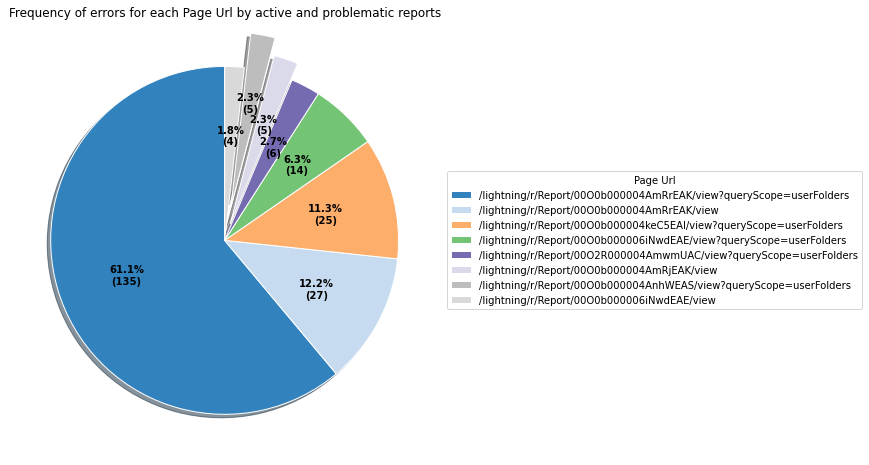

In [113]:
fig, ax = plt.subplots(figsize =(12, 8))

wedges, texts, autotexts = ax.pie(list_count,  
                                  autopct = lambda pct: func(pct, list_count),
                                  explode = explode,
                                  shadow = True, 
                                  colors = outer_colors,
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black"))

ax.legend(wedges, list_ui_page_url, 
          title ="Page Url", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 10, weight ="bold") 
ax.set_title("Frequency of errors for each Page Url by active and problematic reports") 
plt.show() 

### by *Report Name*

In [114]:
ltng_reports_group = ltng_reports.groupby(['Name']).agg({'UI_EVENT_TYPE': 'count'})

In [115]:
ltng_reports_group_sorted = ltng_reports_group.sort_values(by=['UI_EVENT_TYPE'], ascending=False)

In [116]:
ltng_reports_group_sorted.rename(columns={'UI_EVENT_TYPE': 'Count Errors'}, inplace = True)

In [117]:
ltng_reports_group_sorted

,Count Errors
Name,
Chat Average Handle Time,162
SLA - Average Handle Time (Sept),25
New Email By Team - w\o Sup filter,18
S&AS Reactive Queues,9
Agent Work for Supervisor,6
Chat SLA - Wait Time,6
Average Chat Duration,5
My Cases and Tasks,4
Agent Timesheet_Omni,2
